In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp /content/drive/MyDrive/archive.zip /content/



In [ ]:
import zipfile

with zipfile.ZipFile("/content/archive.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/")


In [ ]:
import os


os.listdir("/content")


['.config', 'cell_images', 'archive.zip', 'drive', 'sample_data']

In [ ]:

os.listdir("/content/cell_images")


['Uninfected', 'cell_images', 'Parasitized']

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from sklearn.model_selection import train_test_split
import random


In [ ]:

data = []
labels = []
image_size = (128, 128)
max_images = 4000

infected_dir = "/content/cell_images/Parasitized"
healthy_dir = "/content/cell_images/Uninfected"

for i, img_name in enumerate(os.listdir(infected_dir)):
    if i >= max_images:
        break
    try:
        img = Image.open(os.path.join(infected_dir, img_name)).resize(image_size)
        data.append(np.array(img))
        labels.append(1)
    except:
        continue


for i, img_name in enumerate(os.listdir(healthy_dir)):
    if i >= max_images:
        break
    try:
        img = Image.open(os.path.join(healthy_dir, img_name)).resize(image_size)
        data.append(np.array(img))
        labels.append(0)
    except:
        continue

print("Les nombres Totales de photo est : ", len(data))


Les nombres Totales de photo est :  8000


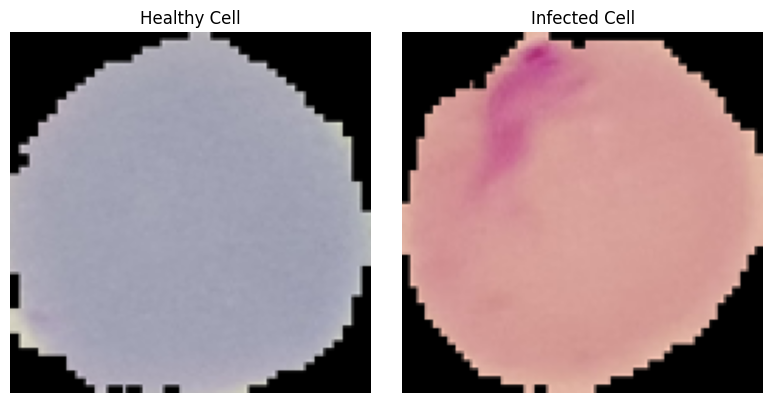

In [ ]:

data_array = np.array(data)
labels_array = np.array(labels)


healthy_indices = np.where(labels_array == 0)[0]
infected_indices = np.where(labels_array == 1)[0]


healthy_img = data_array[random.choice(healthy_indices)]
infected_img = data_array[random.choice(infected_indices)]

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(healthy_img)
plt.title("Healthy Cell")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(infected_img)
plt.title("Infected Cell")
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
data = np.array(data)
labels = np.array(labels)


data = data / 255.0

X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42)


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping






input_shape = (128, 128, 3)


base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')
base_model.trainable = False


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)


model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 64, 64,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 64, 64,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 64, 64,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 64, 64,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 64, 64,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 64, 64,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 65, 65,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 32, 32,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 32, 32,    │      2,304 │ block_1_depthwis

 Total params: 2,340,033 (8.93 MB)

 Trainable params: 82,049 (320.50 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=10, batch_size=32)


Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 101s 475ms/step - accuracy: 0.8387 - loss: 0.3526 - val_accuracy: 0.9156 - val_loss: 0.2258
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 137s 450ms/step - accuracy: 0.9282 - loss: 0.1980 - val_accuracy: 0.9112 - val_loss: 0.2412
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 140s 442ms/step - accuracy: 0.9262 - loss: 0.1936 - val_accuracy: 0.9244 - val_loss: 0.2036
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 141s 439ms/step - accuracy: 0.9375 - loss: 0.1686 - val_accuracy: 0.9325 - val_loss: 0.1951
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 89s 444ms/step - accuracy: 0.9421 - loss: 0.1532 - val_accuracy: 0.9000 - val_loss: 0.2583
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 90s 447ms/step - accuracy: 0.9430 - loss: 0.1505 - val_accuracy: 0.9212 - val_loss: 0.2065
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 137s 425ms/step - accuracy: 0.9517 - loss: 0.1339 - val_accuracy: 0.9200 - val_loss: 0.2332
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 146s 445ms/step - accuracy: 0.9522 - l

In [ ]:
# دقة النموذج
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss = {loss:.4f}, Accuracy = {accuracy:.4f}")


50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 331ms/step - accuracy: 0.9305 - loss: 0.1908
Loss = 0.1901, Accuracy = 0.9306


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


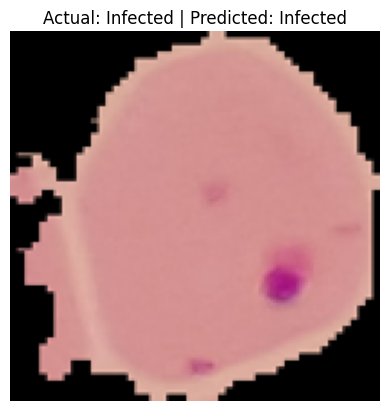

In [ ]:

i = 0
img = X_test[i]
label = y_test[i]

pred = model.predict(np.expand_dims(img, axis=0))[0][0]
predicted_label = 1 if pred >= 0.5 else 0

plt.imshow(img)
plt.title(f"Actual: {'Infected' if label==1 else 'Uninfected'} | Predicted: {'Infected' if predicted_label==1 else 'Uninfected'}")
plt.axis('off')
plt.show()


In [ ]:
model.save("malaria_detector_mobilenet.h5")


In [ ]:
from google.colab import files
files.download("malaria_detector_mobilenet.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>